# Feature Selection

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("OnlineNews.csv")

In [3]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,0.815385,4,2,1,0,...,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,0.791946,3,1,1,0,...,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,0.663866,3,1,1,0,...,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,0.665635,9,0,1,0,...,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,0.540890,19,19,20,0,...,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.045455,0.136364,505


In [4]:
share_df = df["shares"]
share_df.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [5]:
percent = np.array([25,50,75,90])
for i in percent:    
    print('Top', 100-i,'%:',np.percentile(share_df, i))

Top 75 %: 946.0
Top 50 %: 1400.0
Top 25 %: 2800.0
Top 10 %: 6200.0


In [6]:
share_label = list()
for shares in share_df:
    if shares <= 946:
        share_label.append('Very Poor')
    elif shares > 946 and shares <= 1400:
        share_label.append('Poor')
    elif shares > 1400 and shares <= 2800:
        share_label.append('Average')
    elif shares > 2800 and shares <= 6200:
        share_label.append('Good')
    elif shares > 6200:
        share_label.append('Very Good')

In [7]:
df = pd.concat([df, pd.DataFrame(share_label, columns=['popularity'])], axis=1)
df['popularity']=df['popularity'].astype('category')

In [8]:
from sklearn.preprocessing import LabelEncoder
labelEn = LabelEncoder()
encoded_labels = labelEn.fit_transform(df.loc[:, 'popularity'].values)

In [9]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,shares,popularity
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,0.815385,4,2,1,0,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.000000,0.187500,593,Very Poor
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,0.791946,3,1,1,0,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.500000,0.000000,711,Very Poor
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,0.663866,3,1,1,0,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.500000,0.000000,1500,Average
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,0.665635,9,0,1,0,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.500000,0.000000,1200,Poor
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,0.540890,19,19,20,0,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.045455,0.136364,505,Very Poor


## Data Exploration

#### Sentiment & Popularity

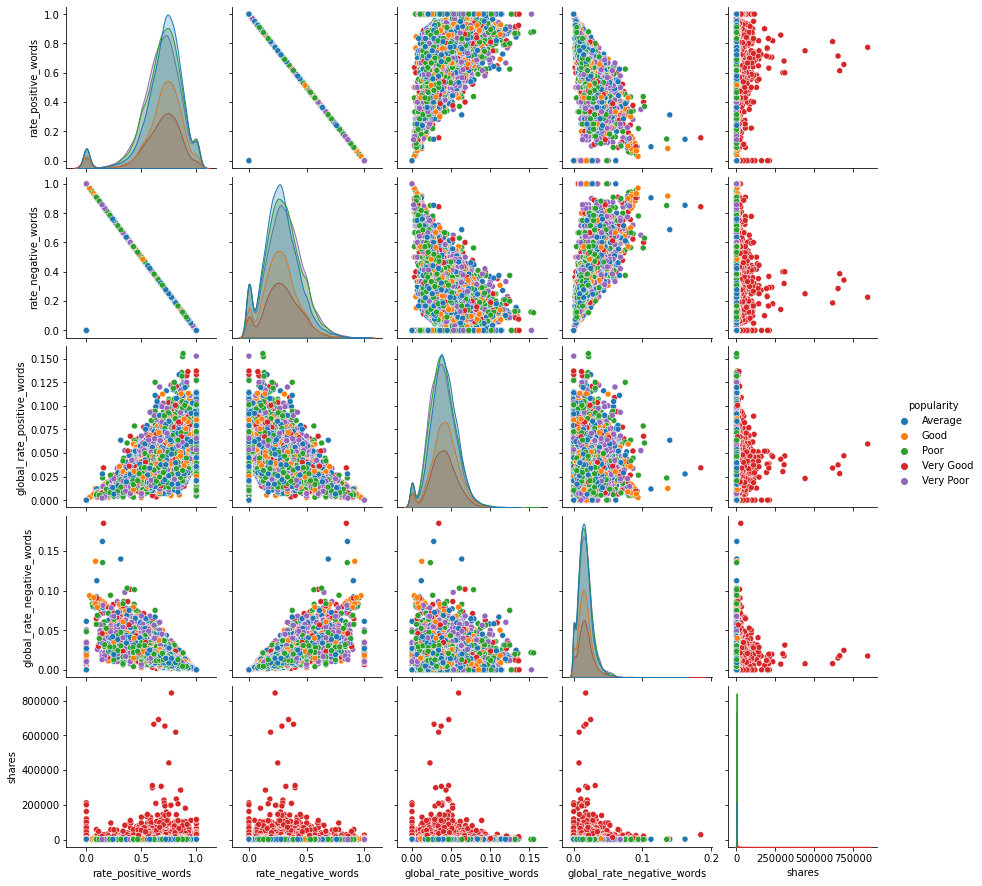

In [10]:
kw_cols = ['rate_positive_words', 'rate_negative_words', 'global_rate_positive_words', 'global_rate_negative_words', 'shares']
sns.pairplot(df, vars=kw_cols, hue='popularity', diag_kind='kde')

#### Category & Popularity

In [ ]:
ax = sns.catplot(x='data_channel', col="popularity", data=df, kind="count", height=8, aspect=.7)


#### Lengths & Popularity

In [ ]:
sns.scatterplot(x='n_tokens_content',y='popularity', data=df)


## KNN Without feature selection

In [ ]:
X = df.iloc[:,:44]
y = df['popularity']

X_dummy = pd.get_dummies(X, columns=['weekdays','data_channel'])


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_std = scaler.fit_transform(X_dummy)
X_std=pd.DataFrame(X_std, columns=X_dummy.columns)